In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

%matplotlib inline

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


### Transformation on the respones variable SalePrice
Let's check the distribution of the response variable SalePrice
It seems not very normal distributed.
So applying the log transformation on the price and plot the distribution of the sale price

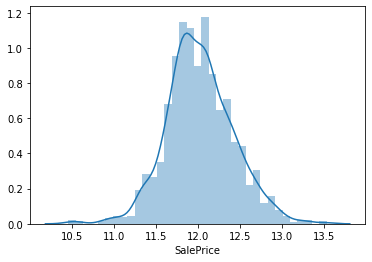

In [8]:
sns.distplot(np.log(train['SalePrice']));
# Fill in your code for transformation

### Preprocessing: Dealing with the missing data (NA) and create dummy variable for categorical variables

Using the mean of the training data to fit in the NA in both training and testing data set. Creating dummy variables for all the text dataset.

In [9]:
test['SalePrice'] = 0

kl = train.append(test)

dummy = pd.get_dummies(kl)
dummy.fillna(dummy.mean(), inplace=True)

train = dummy.iloc[0:1459,:]
test = dummy.iloc[1460:2918,:]

X = train.drop(['Id'], axis=1)
X_test = test.drop(['Id'], axis =1)
Y = np.log(train['SalePrice'])



### Model 1: Using Ridge regression and selecting the best tuning parameter 
- Plotting the cross-validation error for different tuning parameters
- Choosing the best tuning paramter using cross-validation


In [10]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

cv1 = np.array(alphas)*0

for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(scale(X), Y)
    cv1[i] = np.mean(cross_val_score(ridge, scale(X), Y, cv=5))
    

Ridge Best Cross Validation is 0.9442812824147587, and Best Alpha is 5


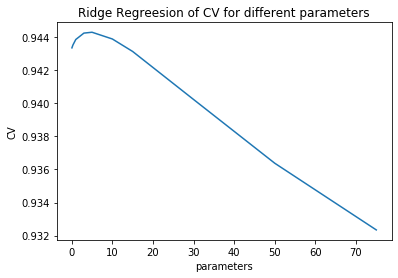

In [11]:

plt.plot(alphas, cv1)
plt.gca().set_xlabel('parameters')
plt.gca().set_ylabel('CV')
plt.gca().set_title('Ridge Regreesion of CV for different parameters')

Best_Alpha_Ridge = np.argmax(cv1)
Best_Alpha = alphas[Best_Alpha_Ridge]
print('Ridge Best Cross Validation is {}, and Best Alpha is {}'.format(np.max(cv1),Best_Alpha))


### Model 2: Exercising Lasso regression and selecting the best tuning parameter 
- Plotting the cross-validation error for different tuning parameters
- Choosing the best tuning paramter using cross-validation


Text(0.5, 1.0, 'Lasso Regreesion of CV for different parameters')

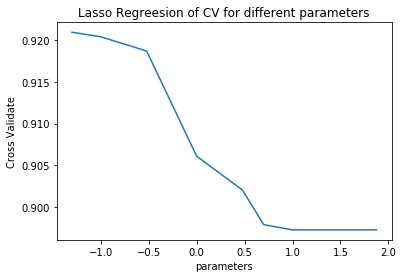

In [12]:
for i,alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha)
    lasso.fit(scale(X), Y)
    cv1[i] = np.mean(cross_val_score(lasso, X, Y,cv=5))


plt.plot(np.log10(alphas), cv1)
plt.gca().set_xlabel('parameters')
plt.gca().set_ylabel('Cross Validate')
plt.gca().set_title('Lasso Regreesion of CV for different parameters')


In [13]:
Best_Alpha_Lasso = np.argmax(cv1)
Best_Alpha1 = alphas[Best_Alpha_Lasso]
print('Lasso Best Cross Validation is {}, and the Best Alpha is {}'.format(np.max(cv1),Best_Alpha1))

Lasso Best Cross Validation is 0.9209635098376282, and the Best Alpha is 0.05


In [14]:
# Ridge Test

ridge_test = Ridge(alpha = Best_Alpha)
ridge_test.fit(scale(X),Y)
np.exp(ridge_test.predict(scale(X_test)))

array([154277.63968051, 177508.1521067 , 181725.26959211, ...,
       119949.33038158, 179475.34949413, 142436.26910237])

In [16]:
# Lasso Test

lasso_test = Lasso(alpha = Best_Alpha1)
lasso_test.fit(scale(X),Y)
np.exp(lasso_test.predict(scale(X_test)))

array([160030.44162951, 164259.83533949, 163359.20383742, ...,
       156069.4676772 , 162527.40235965, 158575.43064109])